### Introduction to Machine Learning with Python
## Chapter 3. 비지도 학습과 데이터 전처리
---
## 군집 (Clustering)

- 군집은 비지도 학습의 대표적인 방법이다.
- 많은 데이터가 주어졌을 때, 이들을 특징적인 몇몇 그룹으로 구분해 주는 기술이다.
- 사실 군집은 지도학습 보다 먼저 수행되는 것이라고 할 수 있다. 역사적으로 초기 공룡 연구자 들이라면 여러 공룡 화석을 수집한 다음 이를 적절히 군집 기술을 이용해 구분함으로서 공룡의 이름을 부여할 수 있었을 것이다. 이렇게 이름(타겟값)을 지정한 다음에 새로운 화석이 나타나면 회귀나 분류를 이용하여 이 화석을 구분할 수 있었을 것이다.

<img src="ch01_05.png"/>
<p style="text-align: center;">특징적인 그룹으로 구분해 주는 여러가지 군집 모델들 (출처: wikipedia)</p>

# k-means 군집화

- k-means 는 대표적인 군집 알고리즘이다.
- 우리가 분류하고 싶은 클래스의 갯수가 k 이다. 모든 샘플들을 공간상에 뿌리고 k개의 중심점 위치를 랜덤하게 잡는다.
- k개의 중심점을 기준으로 공간을 나눈 다음, 나누어진 각 공간에 속한 점들의 평균 위치로 중심점을 이동시킨다.
- 이런 과정을 반복하여 k개의 최종 중심점 위치를 찾아낸다.
- 점들 간의 거리와 거리들의 평균을 계산하기 때문에 **정규화** 가 필요하다.

<img src="ch03_01.jpg"/>
<p style="text-align: center;">출처: https://en.wikipedia.org/wiki/K-means_clustering</p>

- Iris 데이터에서 목표값이 없다고 가정하고 아래에서 k-means 군집 알고리즘을 적용해 보겠다.

In [1]:
import numpy as np
import numpy as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()

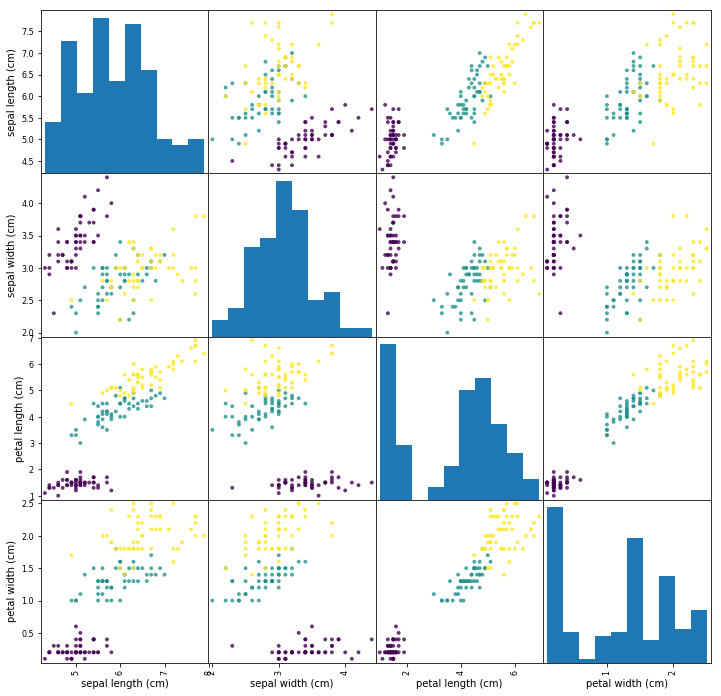

In [2]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, s=60, alpha=0.8, figsize=[12,12])
print('')

- 위의 산점도에서 sepal length 와 petal width 를 살펴보자.

In [3]:
col1 = 0
col2 = 3

X = iris.data[:,[col1,col2]]
y = iris.target # y 값은 군집에서 사용하지 않는다

from sklearn.cluster import KMeans

model = KMeans(3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
labels = model.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1])

In [15]:
# labels = np.where(model.labels_==1, 0, np.where(model.labels_==0, 1, model.labels_))
# labels = model.labels_.copy()
# labels[labels==1]=999
# labels[labels==0]=1
# labels[labels==999]=0

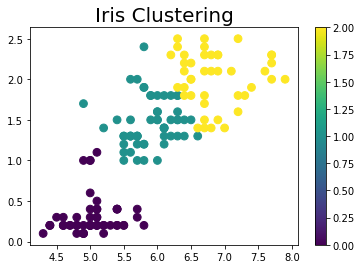

In [9]:
# plt.figure(figsize=[12,8])
plt.title('Iris Clustering', fontsize=20)
plt.scatter(X[:,0], X[:,1], c=labels, s=60)
plt.colorbar()

- 위 그림과 model.labels_ 값을 보면, 기존 타겟값과 유사하게 0,1,2 로 값이 지정되었음을 볼 수 있다.
- 아래에서 기존 클래스와 군집 결과를 비교해 보겠다.

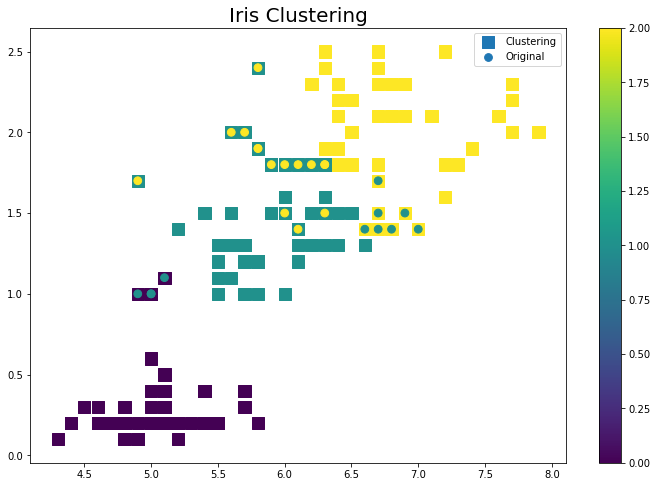

In [10]:
plt.figure(figsize=[12,8])
plt.title('Iris Clustering', fontsize=20)
plt.scatter(X[:,0], X[:,1], c=labels, marker='s', s=150)
CS = plt.scatter(X[:,0], X[:,1], c=y, s=60)
plt.legend(['Clustering', 'Original'])
plt.colorbar(CS)

### 샘플 데이터에 적용

In [19]:
from sklearn.datasets import make_blobs

X, y = make_blobs()

In [20]:
X.shape, y.shape

((100, 2), (100,))

In [21]:
y

array([0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1,
       2, 1, 0, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 2, 1, 0, 1, 0, 2, 2, 0, 2,
       1, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 1, 0,
       2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2])

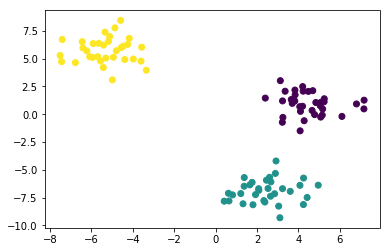

In [22]:
plt.scatter(X[:,0], X[:,1], c=y)

In [29]:
model = KMeans(3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

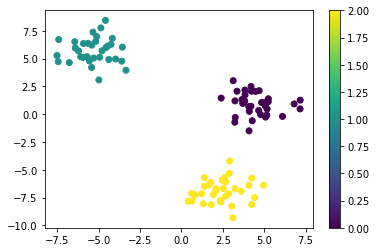

In [33]:
plt.scatter(X[:,0],X[:,1],c=model.labels_)
plt.colorbar()

In [34]:
model.cluster_centers_

array([[ 4.5070438 ,  0.90118604],
       [-5.3160505 ,  5.7240474 ],
       [ 2.43150166, -6.92230318]])

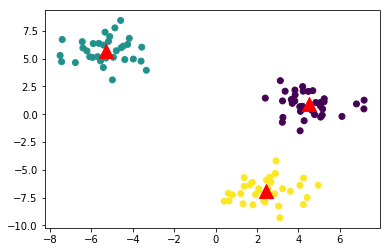

In [35]:
plt.scatter(X[:,0],X[:,1],c=model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='^', c='r', s=200)

In [36]:
model.predict([[0, -5]])

array([2])

### KMeans 의 한계
- 만일 아이리스 데이터를 2개의 군집으로 분류하면 어떻게 될까?

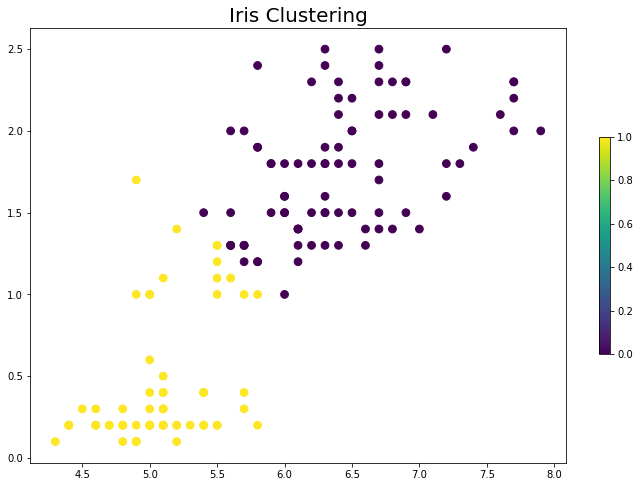

In [37]:
X = iris.data[:,[col1,col2]]

model = KMeans(2)
model.fit(X)

plt.figure(figsize=[12,8])
plt.title('Iris Clustering', fontsize=20)
plt.scatter(X[:,0], X[:,1], c=model.labels_, s=60)
plt.colorbar(shrink=0.5)

- 위의 결과는 의도하지 않은 것이다. Setosa 와 나머지 것들을 구불할 거라고 예측하지만 그렇지 않다.
- 원인은, 갯수가 균등하지 않고 사이 간격이 충분히 넓지 않았기 때문이다.

In [50]:
model.cluster_centers_ # 중심점 위치들

array([[5.11449275, 0.50724638],
       [6.46419753, 1.78765432]])

In [53]:
model.predict([[6, 1]]) # 결과를 해석하려면 위의 colorbar 를 확인해야 한다.

array([1])

In [54]:
model.transform([[6, 1]]) # 각 중심점 까지의 거리 벡터

array([[1.01337516, 0.91426401]])

### k-means 를 사용한 속성 변경
- 위의 transform() 함수를 사용하면 원래 2개 였던 속성을 4개로 늘리는 효과를 가집니다.
- 만일 10개의 군집으로 나눈다면 속성이 10개로 늘어나게 되는 것이지요.
- 결과를 보면 로지스틱회귀이 일반 결과보다 성능이 좋아졌음을 알 수 있습니다. (속성이 2개인 경우 비교)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target)

kmeans10 = KMeans(10)
X_train_10 = kmeans10.fit_transform(X_train)
X_test_10 = kmeans10.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_10, y_train)

train_score = lr.score(X_train_10, y_train)
test_score = lr.score(X_test_10, y_test)

train_score, test_score

(0.9553571428571429, 0.9736842105263158)

### 다양한 데이터 분포에서 k-means 적용
- 몇가지 특이한 형태의 데이터 분포를 살펴 보겠습니다.

(100, 2) [1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0
 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1]


C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


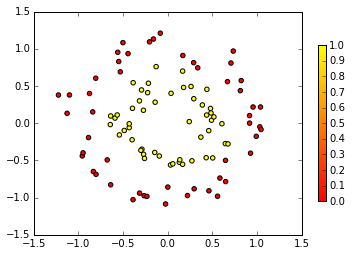

In [35]:
from sklearn.datasets import make_blobs, make_circles, make_moons

X, y = make_circles(factor=0.5, noise=0.1) # factor = R1/R2, noise: svd
print(X.shape, y)

plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.colorbar(shrink=0.7)

(100, 2)

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1], dtype=int32)

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


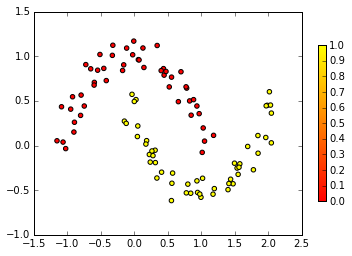

In [36]:
X, y = make_moons(noise=0.1)
display(X.shape, y)

plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.colorbar(shrink=0.7)

- 위와 같은 데이터가 있다고 했을 때, k-means 는 잘 작동하지 않습니다. 왜냐하면 k-means 도 선형적으로 데이터를 구분하기 때문입니다.
- 이런 경우는 데이터의 특성을 시각적으로 확인한 다음, 데이터에 맞는 변환을 먼저 수행한 후에 k-means 를 적용하여야 합니다.
> 첫번째 그림은 각도와 중심거리로, 두번째 그림은 중간에 가상의 sine 곡선을 그리고 그 곡선과의 거리로 변환하면 좋을 것입니다.